# Desbalanceamento

***

<img src="../imagens/desbalaceamento.jpg" alt="Meme" width="400" />

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classes do modelo
from sklearn.linear_model import LogisticRegression

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

Abalone -  O Abalone é um molusco gastrópode, herbívoro, que se alimenta de algas marinhas durante aproximadamente 48 meses.

Preveja a idade do abalone a partir de medições físicas. A idade do abalone é determinada cortando a concha através do cone e contando o número de anéis ao microscópio — uma tarefa tediosa e demorada. Outras medições, que são mais fáceis de obter, são usadas para prever a idade.

https://archive.ics.uci.edu/dataset/1/abalone



<img src="https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcRHtXnpfcmMI86SJA49oJ7AvbstTRqKZM_3puNbPoG19GjpYp6O"
alt="Abalone"
width="400" />

In [169]:
df = pd.read_csv("https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/abalone.csv")

### Name / Data Type / Measurement Unit / Description
Rings / integer / -- / +1.5 gives the age in years (TARGET)

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter	/ continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous	 / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

In [170]:
df.head()

,Rings,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,15,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,7,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,9,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,10,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,7,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### Visualizando a distribuição dos dados por classe

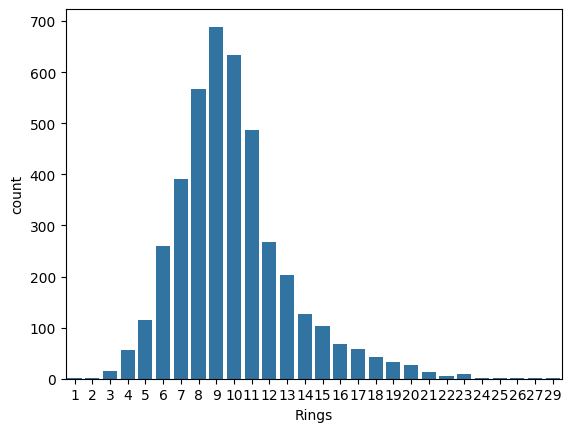

In [171]:
sns.countplot(x="Rings", data=df)
plt.show()

In [172]:
var_min = 5
var_max = 20

### Separando o conjunto de dados

(4067, 9)


<Axes: xlabel='Rings', ylabel='Rings'>

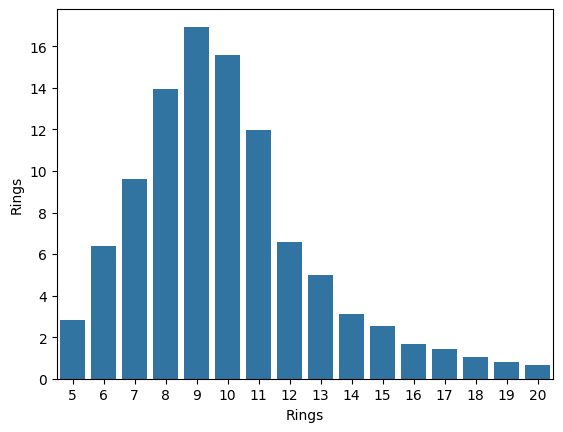

In [173]:
dfFiltrado =  df.loc[(df["Rings"]>=var_min) & (df["Rings"]<=var_max)]

print(dfFiltrado.shape)

#percentual 
sns.barplot(x="Rings", y="Rings",  data=dfFiltrado,  estimator=lambda x: len(x) / len(dfFiltrado) * 100)

In [174]:
dfFiltrado.describe()

,Rings,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
count,4067.000000,4067.000000,4067.000000,4067.000000,4067.000000,4067.000000,4067.000000,4067.000000,4067.000000
mean,9.934104,0.943939,0.528932,0.411844,0.140777,0.838746,0.364741,0.183047,0.241086
std,2.916629,0.824970,0.113202,0.093778,0.040295,0.481763,0.219426,0.108078,0.135620
min,5.000000,0.000000,0.155000,0.115000,0.000000,0.021000,0.007500,0.003500,0.005000
25%,8.000000,0.000000,0.455000,0.350000,0.115000,0.455250,0.192000,0.096500,0.135000
50%,10.000000,1.000000,0.545000,0.425000,0.145000,0.807000,0.341000,0.172000,0.235000
75%,11.000000,2.000000,0.615000,0.480000,0.165000,1.155500,0.505500,0.254000,0.329250
max,20.000000,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [175]:
X = dfFiltrado.iloc[:,1:8]
y = dfFiltrado.iloc[:,0]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=20)

print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (2846, 7)
Shape de X_test: (1221, 7)
Shape de y_train: (2846,)
Shape de y_test: (1221,)


### Treinando o modelo

In [176]:
model = LogisticRegression()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.57      0.12      0.20        34
           6       0.35      0.44      0.39        78
           7       0.28      0.30      0.29       117
           8       0.28      0.32      0.30       171
           9       0.25      0.43      0.32       207
          10       0.25      0.39      0.30       190
          11       0.28      0.27      0.27       146
          12       0.00      0.00      0.00        80
          13       0.00      0.00      0.00        61
          14       0.00      0.00      0.00        38
          15       0.00      0.00      0.00        31
          16       0.00      0.00      0.00        20
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00        13
          19       0.00      0.00      0.00        10
          20       0.00      0.00      0.00         8

    accuracy                           0.27      1221
   macro avg       0.14   

In [177]:
from sklearn.neural_network import MLPClassifier

# Definindo o modelo MLP
model = MLPClassifier(hidden_layer_sizes=(300), activation='relu', random_state=20)

# Treinando o modelo
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.67      0.59      0.62        34
           6       0.38      0.33      0.36        78
           7       0.35      0.38      0.36       117
           8       0.37      0.27      0.31       171
           9       0.28      0.43      0.34       207
          10       0.20      0.39      0.27       190
          11       0.31      0.24      0.27       146
          12       0.00      0.00      0.00        80
          13       0.15      0.11      0.13        61
          14       0.00      0.00      0.00        38
          15       0.00      0.00      0.00        31
          16       0.25      0.10      0.14        20
          17       0.33      0.06      0.10        17
          18       0.00      0.00      0.00        13
          19       0.00      0.00      0.00        10
          20       0.00      0.00      0.00         8

    accuracy                           0.28      1221
   macro avg       0.21   

----------------------------------------------------------------
## SMOTE

Vamos usar um pacote que lida com problemas de desbalanceamento de classes em conjuntos de dados, oferecendo técnicas como:

- SMOTE (oversampling): que gera novas amostras sintéticas da classe **minoritária**, em vez de simplesmente duplicar as amostras existentes.
- Undersampling: reduz o número de amostras da classe **majoritária** para balancear o dataset.

Lembre de instalar o `imblearn`:

In [178]:
# !pip install imblearn

In [179]:
from imblearn.over_sampling import SMOTE

### Aplicando o SMOTE

In [180]:
smt = SMOTE(random_state=20, sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

### Gerando um novo dataset (balanceado)

Criando um novo dataset com as amostras balanceadas...

(7712, 8)


<Axes: xlabel='Rings', ylabel='Rings'>

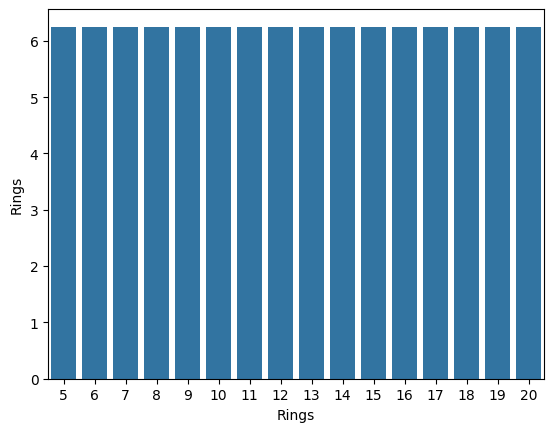

In [181]:
df_SMOTE = pd.DataFrame(X_smt, columns=X_train.columns)
df_SMOTE.insert(0, 'Rings', y_smt)  # Inserir 'Rings' na posição 0

print(df_SMOTE.shape)

#percentual 
sns.barplot(x="Rings", y="Rings",  data=df_SMOTE,  estimator=lambda x: len(x) / len(df_SMOTE) * 100)

In [182]:
df_SMOTE.describe()

,Rings,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight
count,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000
mean,12.500000,0.855939,0.539819,0.423196,0.147653,0.922326,0.373742,0.196932
std,4.610071,0.800317,0.116468,0.097979,0.039102,0.501678,0.210132,0.108707
min,5.000000,0.000000,0.175000,0.125000,0.000000,0.023500,0.008000,0.003500
25%,8.750000,0.000000,0.475000,0.370000,0.125000,0.546504,0.218186,0.115500
50%,12.500000,1.000000,0.564694,0.442900,0.155000,0.938706,0.365075,0.196000
75%,16.250000,2.000000,0.625000,0.495000,0.175000,1.259029,0.507889,0.268513
max,20.000000,2.000000,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000


In [183]:
X = df_SMOTE.iloc[:,1:8]
y = df_SMOTE.iloc[:,0]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=20)

print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (5398, 7)
Shape de X_test: (2314, 7)
Shape de y_train: (5398,)
Shape de y_test: (2314,)


### Treinando o modelo

In [184]:
model = LogisticRegression(random_state=20)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.58      0.84      0.69       145
           6       0.35      0.38      0.36       144
           7       0.18      0.21      0.19       145
           8       0.17      0.25      0.20       145
           9       0.15      0.17      0.16       145
          10       0.21      0.10      0.14       144
          11       0.24      0.40      0.30       145
          12       0.20      0.06      0.09       145
          13       0.14      0.06      0.08       144
          14       0.00      0.00      0.00       145
          15       0.11      0.14      0.12       145
          16       0.17      0.03      0.06       144
          17       0.14      0.27      0.18       145
          18       0.00      0.00      0.00       144
          19       0.30      0.37      0.33       145
          20       0.29      0.65      0.40       144

    accuracy                           0.25      2314
   macro avg       0.20   

In [185]:
# Definindo o modelo MLP
model = MLPClassifier(hidden_layer_sizes=(300), activation='relu', random_state=20)

# Treinando o modelo
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.61      0.84      0.71       145
           6       0.37      0.31      0.34       144
           7       0.27      0.30      0.28       145
           8       0.35      0.25      0.29       145
           9       0.24      0.33      0.28       145
          10       0.19      0.13      0.16       144
          11       0.23      0.27      0.25       145
          12       0.30      0.09      0.14       145
          13       0.13      0.15      0.14       144
          14       0.16      0.11      0.13       145
          15       0.11      0.10      0.10       145
          16       0.20      0.07      0.10       144
          17       0.35      0.26      0.30       145
          18       0.62      0.22      0.33       144
          19       0.29      0.48      0.36       145
          20       0.32      0.83      0.46       144

    accuracy                           0.30      2314
   macro avg       0.30   

--------------------

Experimente com uma seleção diferente da base.

Que tal var_min = 4 e var_max = 12?